In [45]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [46]:
df_coins = pd.read_csv('Data_collector/Data_ETL.csv')

In [47]:
df_coins.head()

,Moneda,Siglas,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV,Cap merc/FDV
0,Bitcoin,BTC,29307.18,0.1,-0.0,-1.5,7723718124,570402375708,615595340248,093
1,Ethereum,ETH,1839.65,0.1,-0.2,-0.7,4068070711,221092122908,221092122908,100
2,Tether,USDT,1.00,0.0,0.0,-0.0,10387278843,83318841504,83318841504,100
3,BNB,BNB,239.14,0.1,-0.4,-2.4,337229328,36784347479,47816544843,077
4,XRP,XRP,0.62,-0.5,-1.1,-2.8,831972828,32848276921,62227631637,053


In [48]:
df_coins.tail()

,Moneda,Siglas,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV,Cap merc/FDV
995,IMPT,IMPT,0.01,0.2,-0.8,10.1,1598427,8453407,19703281,043
996,Prosper,PROS,0.28,-0.7,-4.4,-2.7,1045387,8450081,27813004,030
997,Grizzly Honey,GHNY,6.82,-0.0,-1.4,-4.7,517510,8419248,8419774,100
998,SIX Network,SIX,0.03,1.7,16.9,25.9,1538350,8419150,30751899,027
999,Bitrue Coin,BTR,0.03,0.1,-0.2,-6.7,2262443,8409523,30689172,027


In [49]:
df_coins.shape

(1000, 10)

In [50]:
df_coins.isnull().sum()

Moneda                 0
Siglas                 0
Precio                 0
Cambio 1 h             0
Cambio 24 h            0
Cambio 7 d             0
Volumen en 24 horas    0
Cap. de mercado        0
FDV                    0
Cap merc/FDV           0
dtype: int64

In [51]:
df_coins.duplicated().sum()

0

In [52]:
df_coins.dtypes

Moneda                  object
Siglas                  object
Precio                 float64
Cambio 1 h             float64
Cambio 24 h            float64
Cambio 7 d             float64
Volumen en 24 horas      int64
Cap. de mercado          int64
FDV                      int64
Cap merc/FDV            object
dtype: object

In [53]:
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Moneda               1000 non-null   object 
 1   Siglas               1000 non-null   object 
 2   Precio               1000 non-null   float64
 3   Cambio 1 h           1000 non-null   float64
 4   Cambio 24 h          1000 non-null   float64
 5   Cambio 7 d           1000 non-null   float64
 6   Volumen en 24 horas  1000 non-null   int64  
 7   Cap. de mercado      1000 non-null   int64  
 8   FDV                  1000 non-null   int64  
 9   Cap merc/FDV         1000 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 78.2+ KB


In [54]:
df_coins['Moneda'].value_counts()

Terra                 2
Bitcoin               1
ParaSwap              1
district0x            1
Vaiot                 1
                     ..
Smooth Love Potion    1
XCAD Network          1
Hunt                  1
Maverick Protocol     1
Bitrue Coin           1
Name: Moneda, Length: 999, dtype: int64

In [55]:
df_coins['Siglas'].value_counts()

TIME     2
TON      2
FEG      2
MELD     2
MOON     2
        ..
LEASH    1
POWR     1
SLP      1
XCAD     1
BTR      1
Name: Siglas, Length: 990, dtype: int64

In [56]:
df_coins.describe()

,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,284.136390,-0.117400,-0.697600,1.850800,3.786118e+07,1.211347e+09,1.527527e+09
std,2602.147413,1.356694,6.838424,25.345443,4.399291e+08,1.960124e+10,2.105996e+10
min,0.000000,-15.000000,-54.700000,-61.000000,0.000000e+00,8.409523e+06,0.000000e+00
25%,0.020000,-0.400000,-2.500000,-4.100000,4.460890e+05,1.650590e+07,2.724618e+07
50%,0.210000,0.000000,-0.900000,-1.100000,1.728012e+06,3.468603e+07,6.598207e+07
75%,1.090000,0.100000,0.100000,1.700000,6.160160e+06,1.010826e+08,1.976704e+08
max,29338.120000,10.600000,85.600000,558.300000,1.038728e+10,5.704024e+11,6.155953e+11


El precio promedio de las criptomonedas en este conjunto de datos es aproximadamente 284.14.
El cambio promedio en la última hora es -0.1174, lo que sugiere un promedio de disminución en el valor en esa hora.
El cambio promedio en las últimas 24 horas es -0.6976, lo que sugiere una disminución en el valor en ese período.
El cambio promedio en los últimos 7 días es 1.8508, lo que sugiere un aumento en el valor durante ese período.
El volumen promedio en las últimas 24 horas es alrededor de 37,861,180.
La capitalización de mercado promedio es aproximadamente 1,211,347,000,000 (1.21 billones).
La FDV promedio es aproximadamente 1,527,527,000,000 (1.52 billones).
la desviación estándar alta en "Precio" sugiere que hay una variabilidad significativa en los precios de las criptomonedas en este conjunto de datos.

In [57]:
df_coins.nunique()

Moneda                  999
Siglas                  990
Precio                  325
Cambio 1 h               80
Cambio 24 h             205
Cambio 7 d              322
Volumen en 24 horas     979
Cap. de mercado        1000
FDV                     965
Cap merc/FDV            109
dtype: int64

In [58]:
df_coins['Moneda'].unique()

array(['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'XRP', 'USD Coin',
       'Lido Staked Ether', 'Dogecoin', 'Cardano', 'Solana', 'TRON',
       'Polkadot', 'Shiba Inu', 'Polygon', 'Litecoin', 'Toncoin',
       'Wrapped Bitcoin', 'Uniswap', 'Bitcoin Cash', 'Avalanche', 'Dai',
       'Chainlink', 'LEO Token', 'Stellar', 'Binance USD', 'Monero',
       'OKB', 'TrueUSD', 'Cosmos Hub', 'Ethereum Classic', 'Hedera',
       'Internet Computer', 'Filecoin', 'Aptos', 'Lido DAO', 'Cronos',
       'Mantle', 'Quant', 'Arbitrum', 'VeChain', 'NEAR Protocol', 'Maker',
       'Optimism', 'Rocket Pool ETH', 'The Graph', 'Aave', 'XDC Network',
       'Algorand', 'WhiteBIT Coin', 'Frax', 'Stacks', 'Kaspa', 'EOS',
       'The Sandbox', 'MultiversX', 'Synthetix Network', 'ImmutableX',
       'Axie Infinity', 'Theta Network', 'Tezos', 'ApeCoin', 'USDD',
       'Bitcoin SV', 'Fantom', 'Decentraland', 'FLEX Coin',
       'Bitget Token', 'Render', 'Injective', 'Radix', 'NEO', 'GALA',
       'Kava', 'eCash', 'Flo

In [59]:
df_coins[df_coins.dtypes[df_coins.dtypes == 'object'].index].describe()

,Moneda,Siglas,Cap merc/FDV
count,1000,1000,1000
unique,999,990,109
top,Terra,TIME,100
freq,2,2,161


df_coins contiene información sobre diferentes criptomonedas, y las columnas que se están describiendo incluyen "Moneda", "Siglas" y "Cap merc/FDV". Aquí está la explicación de cada parte de la salida:

Moneda: hay 1000 valores en la columna "Moneda".
count: Número de registros no nulos en la columna "Moneda".
unique: Número de valores únicos en la columna "Moneda". En este caso, hay 999 valores únicos.
top: El valor más común (más frecuente) en la columna "Moneda".
freq: Frecuencia del valor más común en la columna "Moneda". En este caso, el valor "Terra" se repite 2 veces, lo que lo convierte en el valor más común.

Siglas: Hay 1000 valores en la columna "Siglas".
count: Número de registros no nulos en la columna "Siglas".
unique: Número de valores únicos en la columna "Siglas". Hay 990 valores únicos.
top: El valor más común en la columna "Siglas".
freq: Frecuencia del valor más común en la columna "Siglas". En este caso, el valor "TIME" se repite 2 veces, lo que lo convierte en el valor más común.

Cap merc/FDV: Hay 1000 valores en la columna "Cap merc/FDV".
count: Número de registros no nulos en la columna "Cap merc/FDV".
unique: Número de valores únicos en la columna "Cap merc/FDV". Hay 109 valores únicos.
top: El valor más común en la columna "Cap merc/FDV".
freq: Frecuencia del valor más común en la columna "Cap merc/FDV". En este caso, el valor "100" se repite 161 veces, lo que lo convierte en el valor más común.


In [60]:
df_coins_summary = pd.pivot_table(df_coins, index=['Moneda'], aggfunc ='mean')

In [61]:
df_coins_summary

,Cambio 1 h,Cambio 24 h,Cambio 7 d,Cap. de mercado,FDV,Precio,Volumen en 24 horas
Moneda,,,,,,,
0x Protocol,-0.6,-3.0,0.0,20161807.0,260642807.0,0.22,14439841.0
0x0.ai: AI Smart Contract,1.0,-13.2,15.0,33352824.0,37422524.0,0.04,652006.0
0xBitcoin,0.0,0.0,0.0,25697903.0,49799875.0,2.37,0.0
1inch,-0.4,-2.9,-1.7,311079034.0,453362685.0,0.30,15051603.0
A Hunters Dream,0.1,-2.1,-14.8,37384796.0,39146384.0,0.00,1056373.0
...,...,...,...,...,...,...,...
tomiNet,-0.1,-3.6,-18.6,165168694.0,282069170.0,2.50,15168741.0
veCRV-DAO yVault,0.0,0.0,0.0,15419092.0,15419092.0,0.75,0.0
xExchange,-0.4,-1.7,-7.0,19865129.0,41291983.0,0.00,2018958.0


## miramos los outliers


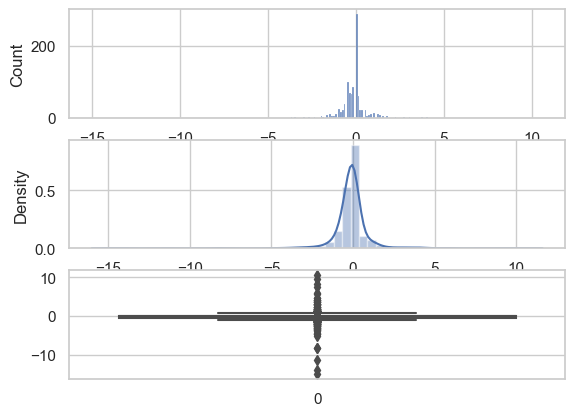

In [62]:
fig, axs = plt.subplots(nrows = 3)

sns.histplot(df_coins['Cambio 1 h'], ax = axs[0]);
sns.distplot(df_coins['Cambio 1 h'], ax = axs[1]);
sns.boxplot(df_coins['Cambio 1 h'], ax = axs[2]);

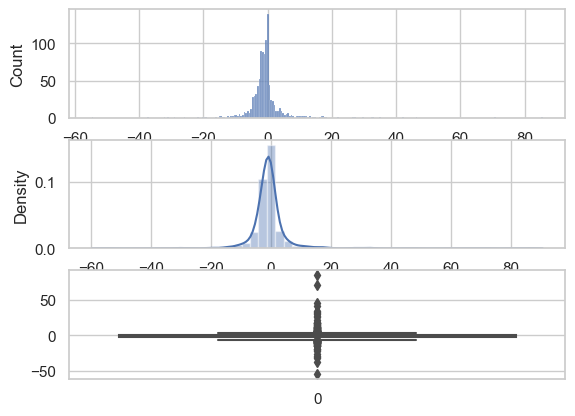

In [63]:
fig, axs = plt.subplots(nrows = 3)

sns.histplot(df_coins['Cambio 24 h'], ax = axs[0]);
sns.distplot(df_coins['Cambio 24 h'], ax = axs[1]);
sns.boxplot(df_coins['Cambio 24 h'], ax = axs[2]);

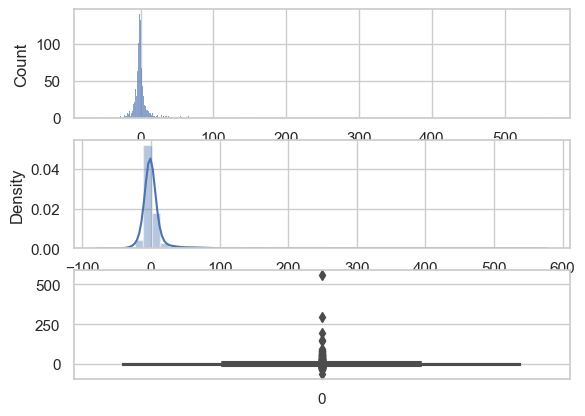

In [64]:
fig, axs = plt.subplots(nrows = 3)

sns.histplot(df_coins['Cambio 7 d'], ax = axs[0]);
sns.distplot(df_coins['Cambio 7 d'], ax = axs[1]);
sns.boxplot(df_coins['Cambio 7 d'], ax = axs[2]);

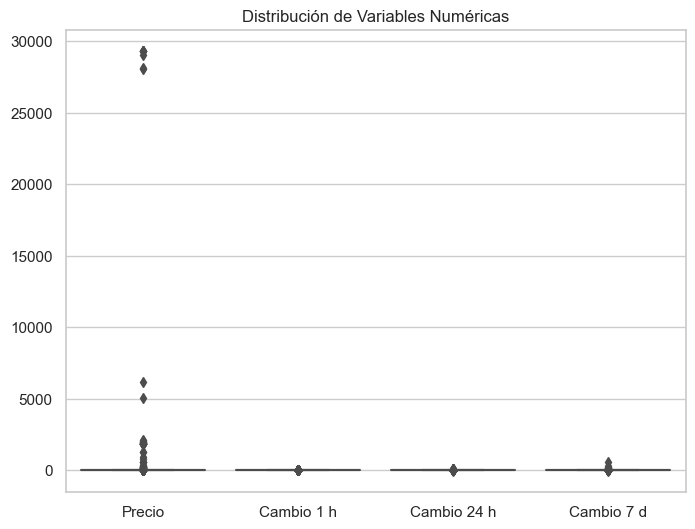

In [65]:
# Visualizar la distribución de las variables numéricas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_coins[['Precio', 'Cambio 1 h', 'Cambio 24 h', 'Cambio 7 d']])
plt.title('Distribución de Variables Numéricas')
plt.show()

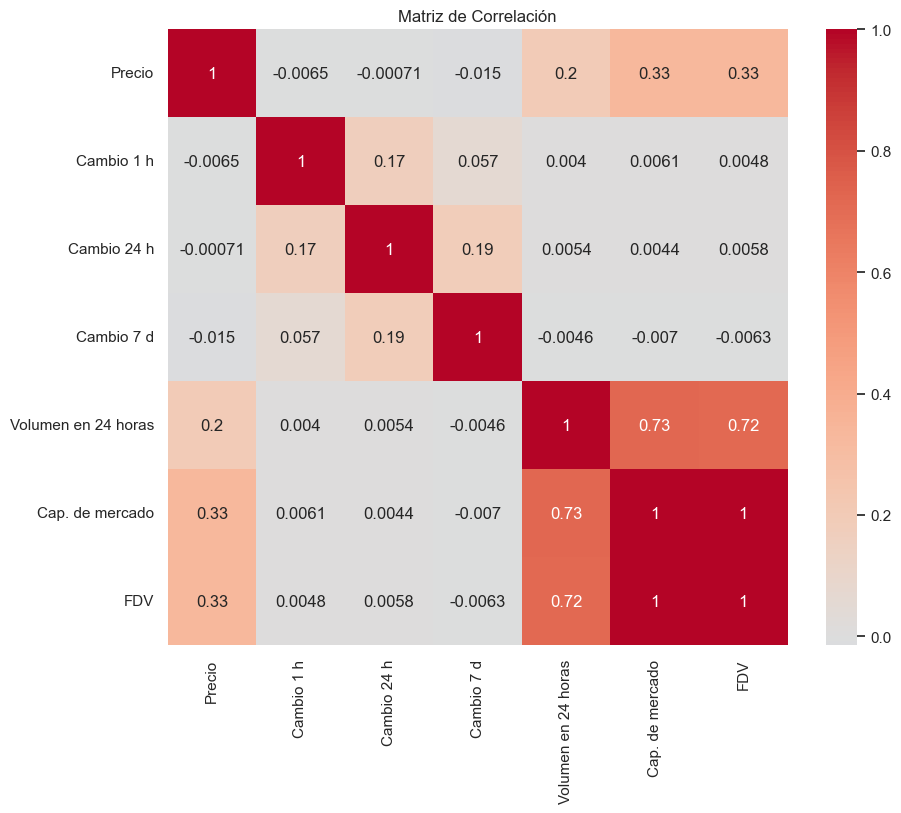

In [66]:
# Correlación entre variables numéricas
correlation_matrix = df_coins.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

los valores rojos (cercanos a 1) en la matriz de correlación indican una correlación fuerte y positiva entre "Cap. de mercado" y "FDV" en ambas direcciones. Esto significa que cuando una de estas dos variables aumenta, es probable que la otra también aumente. Además, la correlación cercana a -0.00065 entre "Precio" y "Cambio 1 h", lo que sugiere una correlación muy débil y negativa entre estas dos variables. Esto indica que no hay una relación lineal fuerte entre los cambios en el precio y los cambios en la última hora.

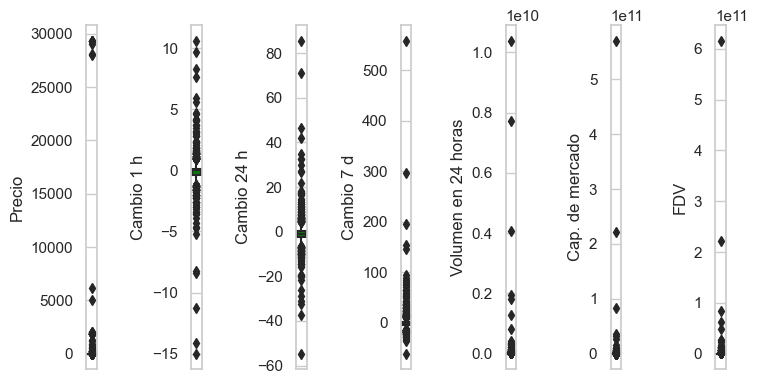

In [67]:
# Obtener el nombre de las columnas y su número
cols = df_coins.columns.values
col_num = 12

# Filtrar las columnas que deseas omitir en el gráfico de caja
columns_to_exclude = [
    "#",
    "Moneda",
    "Siglas",
    "Cap merc/FDV",
]
# Calcular el número de filas para el tamaño de la gráfica
row_num = math.ceil((len(cols) - 1) / col_num)  # Restamos 2 para omitir la columna 

# Definir el tamaño de forma dinámica para poder reutilizar el código
plt.figure(figsize=(col_num, 4 * row_num))

# Crear una gráfica de caja para cada columna excepto "Ingresos (miles de pesos)"
for i in range(0, len(cols)):
    if cols[i] not in columns_to_exclude:
        plt.subplot(row_num, col_num, i + 1)
        sns.set_style('whitegrid')
        
        # Verificar si la columna es numérica
        if pd.api.types.is_numeric_dtype(df_coins[cols[i]]):
            # Convertir la columna a tipo numérico y eliminar los valores NaN
            columna_numerica = pd.to_numeric(df_coins[cols[i]], errors='coerce').dropna()
            sns.boxplot(y=columna_numerica, color='green', orient='v')
            plt.ylabel(cols[i])  # Agregar el nombre de la columna al eje y
        else:
            continue  # Omitir la columna si no es numérica
        
        plt.tight_layout()

plt.show()


In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas numéricas para realizar el análisis
numeric_columns = ['Precio','Cambio 1 h','Cambio 24 h','Cambio 7 d','Volumen en 24 horas','Cap. de mercado','FDV']

# Filtra el DataFrame solo para las columnas numéricas
df_numeric = df_coins[numeric_columns]

# Estandariza los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Realiza el análisis de componentes principales (PCA)
pca = PCA()
components = pca.fit_transform(df_scaled)

# Obtén la proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Visualiza la proporción de varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Imprime la proporción de varianza explicada acumulada
print("Proporción de varianza explicada acumulada:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Componente {i+1}: {ratio:.2f}")

Proporción de varianza explicada acumulada:
Componente 1: 0.40
Componente 2: 0.58
Componente 3: 0.71
Componente 4: 0.84
Componente 5: 0.95
Componente 6: 1.00
Componente 7: 1.00


In [69]:
from sklearn.cluster import KMeans

# Obtener solo las columnas numéricas para el clustering
numeric_columns = ['Precio','Cambio 1 h','Cambio 24 h','Cambio 7 d','Volumen en 24 horas','Cap. de mercado','FDV']
df_numeric = df_coins[numeric_columns]  # Filtra las columnas numéricas del DataFrame df

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Calcular la suma de los cuadrados internos (WCSS) para diferentes valores de k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)



In [70]:
wcss

[7000.0000000000055,
 4819.153199787093,
 3961.9389296142595,
 3254.8177080358378,
 2617.8954977614458,
 2116.1731187413857,
 1774.342189021983,
 1556.8472841955659,
 1374.5370662440494,
 1224.3974563763973]

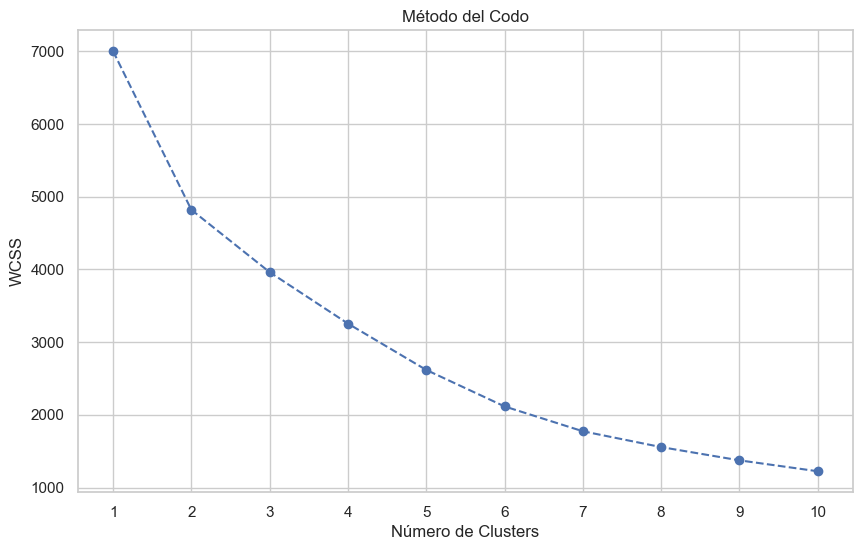

In [71]:
# Graficar la suma de los cuadrados internos (WCSS) en función de la cantidad de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

Grupo 0:
            Precio  Cambio 1 h  Cambio 24 h  Cambio 7 d  Volumen en 24 horas  \
count   990.000000  990.000000   990.000000  990.000000         9.900000e+02   
mean     50.992515   -0.116768    -0.698081    1.884040         1.579804e+07   
std     348.081714    1.358872     6.871680   25.470183         1.026858e+08   
min       0.000000  -15.000000   -54.700000  -61.000000         0.000000e+00   
25%       0.020000   -0.400000    -2.500000   -4.100000         4.552555e+05   
50%       0.200000   -0.000000    -0.900000   -1.100000         1.728012e+06   
75%       1.040000    0.100000     0.100000    1.775000         6.120590e+06   
max    6124.850000   10.600000    85.600000  558.300000         1.955674e+09   

       Cap. de mercado           FDV  Cluster  
count     9.900000e+02  9.900000e+02    990.0  
mean      3.346618e+08  6.083867e+08      0.0  
std       2.004948e+09  3.217938e+09      0.0  
min       8.409523e+06  0.000000e+00      0.0  
25%       1.651106e+07  2.7325

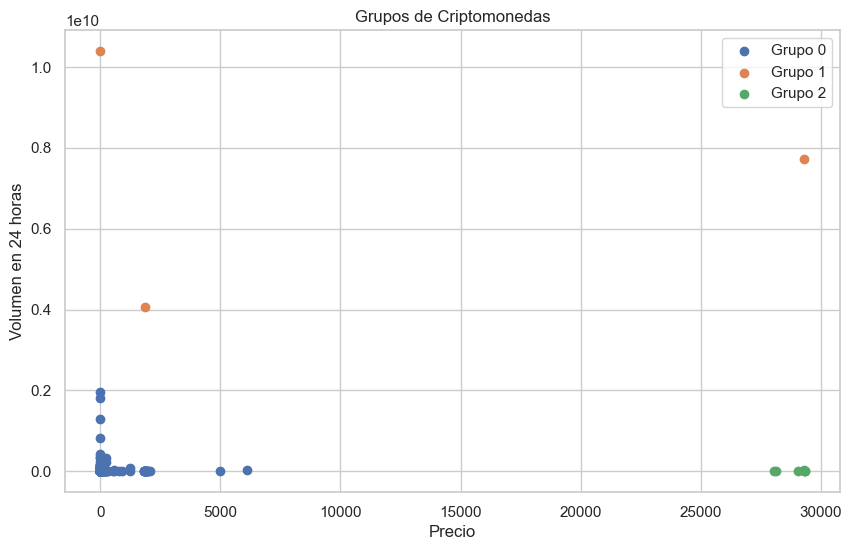

In [72]:
# Obtener solo las columnas numéricas para el clustering
numeric_columns = ['Precio', 'Cambio 1 h', 'Cambio 24 h', 'Cambio 7 d', 'Volumen en 24 horas', 'Cap. de mercado', 'FDV']
df_numeric = df_coins[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Ejecutar KMeans con el número óptimo de grupos (elegido por ti)
num_clusters = 3  # Puedes ajustar esto según tu elección
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
df_coins['Cluster'] = kmeans.fit_predict(df_scaled)

# Análisis y visualización de los grupos
for cluster_id in range(num_clusters):
    cluster_data = df_coins[df_coins['Cluster'] == cluster_id]
    print(f"Grupo {cluster_id}:")
    print(cluster_data.describe())  # Estadísticas descriptivas para cada grupo
    print("\n")

# Visualizar los grupos entre Precio y Volumen en 24 horas
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = df_coins[df_coins['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Precio'], cluster_data['Volumen en 24 horas'], label=f'Grupo {cluster_id}')

plt.title('Grupos de Criptomonedas')
plt.xlabel('Precio')
plt.ylabel('Volumen en 24 horas')
plt.legend()
plt.show()

# Dar significado a los grupos (esto puedes hacer manualmente)
group_meanings = {
    0: 'Monedas Volátiles',
    1: 'Monedas Medianamente Volátiles',
    2: 'Monedas Estables'
}
df_coins['Grupo'] = df_coins['Cluster'].map(group_meanings)


In [73]:
# Etiquetar los datos con grupos obtenidos del clustering
num_clusters = 3  # Define el número de clusters óptimo basado en el gráfico del codo
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
df_coins['Grupo'] = kmeans.fit_predict(df_scaled)

# Define un diccionario para mapear las etiquetas de grupo a nombres de grupos
group_meanings = {
    0: 'Monedas Volátiles',
    1: 'Monedas Medianamente Volátiles',
    2: 'Monedas Estables'  
}

# Agrupar las monedas por grupo y calcular estadísticas descriptivas
group_stats = df_coins.groupby('Grupo').describe()

# Imprimir información de cada grupo, incluyendo las monedas en ese grupo
for group_id, group_data in group_stats.iterrows():
    print(f"Grupo {group_id}:")
    print(group_data)
    coins_in_group = df_coins[df_coins['Grupo'] == group_id]['Moneda']
    print("Monedas en este grupo:")
    print(coins_in_group)
    print("\n")


Grupo 0:
Precio   count    990.000000
         mean      50.992515
         std      348.081714
         min        0.000000
         25%        0.020000
                     ...    
Cluster  min        0.000000
         25%        0.000000
         50%        0.000000
         75%        0.000000
         max        0.000000
Name: 0, Length: 64, dtype: float64
Monedas en este grupo:
3                    BNB
4                    XRP
5               USD Coin
6      Lido Staked Ether
7               Dogecoin
             ...        
995                 IMPT
996              Prosper
997        Grizzly Honey
998          SIX Network
999          Bitrue Coin
Name: Moneda, Length: 990, dtype: object


Grupo 1:
Precio   count        3.000000
         mean     10382.610000
         std      16414.922197
         min          1.000000
         25%        920.325000
                      ...     
Cluster  min          1.000000
         25%          1.000000
         50%          1.000000
       

In [74]:
# Crear un DataFrame a partir de la información resumida de cada grupo
group_df = pd.DataFrame()

# Agregar las estadísticas descriptivas de cada grupo al nuevo DataFrame
for group_id, group_data in group_stats.iterrows():
    group_info = {
        'Grupo': group_id,
        'Precio_mean': group_data[('Precio', 'mean')],
        'Precio_std': group_data[('Precio', 'std')],
        'Cambio1h_mean': group_data[('Cambio 1 h', 'mean')],
        'Cambio24h_mean': group_data[('Cambio 24 h', 'mean')],
        'Cambio7d_mean': group_data[('Cambio 7 d', 'mean')],
        # Agrega más columnas de estadísticas según tus necesidades
    }
    group_df = group_df.append(group_info, ignore_index=True)

# Imprimir el nuevo DataFrame con la información resumida de cada grupo
group_df.head(20)


,Grupo,Precio_mean,Precio_std,Cambio1h_mean,Cambio24h_mean,Cambio7d_mean
0,0.0,50.992515,348.081714,-0.116768,-0.698081,1.884040
1,1.0,10382.610000,16414.922197,0.066667,-0.066667,-0.733333
2,2.0,28929.424286,585.219851,-0.285714,-0.900000,-1.742857


In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Obtener solo las columnas numéricas para el clustering
numeric_columns = ['Precio', 'Cambio 1 h', 'Cambio 24 h', 'Cambio 7 d', 'Volumen en 24 horas', 'Cap. de mercado', 'FDV']
df_numeric = df_coins[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Calcular la silueta media para diferentes valores de k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

In [76]:
silhouette_scores

[0.9427591667365555,
 0.8699911044243431,
 0.8704052228088295,
 0.8371384807304798,
 0.7480815883016679,
 0.7667193246964241,
 0.7265809379851066,
 0.6287023220981297,
 0.5270730763716476]

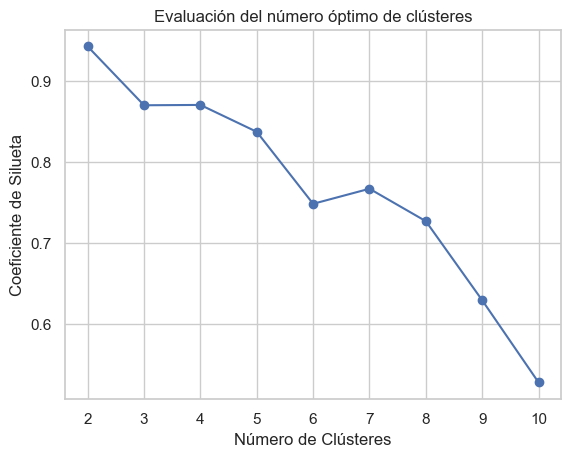

In [77]:
# Valores de k (número de clústeres)
k_values = range(2, 11)

# Graficar la curva del coeficiente de silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('Evaluación del número óptimo de clústeres')
plt.show()

In [78]:
# Elegir el número óptimo de clústeres basado en la curva de silueta
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Número óptimo de clústeres: {optimal_num_clusters}")

# Realizar el clústering con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Agregar las etiquetas de clústeres al DataFrame original
df_coins['Cluster'] = labels

# Análisis de clústeres
for group_id in range(optimal_num_clusters):
    print(f"Grupo {group_id}:")
    group_data = df_coins[df_coins['Cluster'] == group_id][numeric_columns + ['Cluster']]
    print(group_data.describe())

    coins_in_group = df_coins[df_coins['Cluster'] == group_id]['Moneda']
    print("Monedas en este grupo:")
    print(coins_in_group)

# Guardar el DataFrame con las etiquetas de clústeres
df_coins.to_csv('Data_collector/coins_clustered.csv', index=False)

Número óptimo de clústeres: 2
Grupo 0:
             Precio  Cambio 1 h  Cambio 24 h  Cambio 7 d  Volumen en 24 horas  \
count    997.000000  997.000000   997.000000  997.000000         9.970000e+02   
mean     253.749809   -0.117954    -0.699498    1.858576         1.572930e+07   
std     2437.706343    1.358695     6.848625   25.383165         1.023335e+08   
min        0.000000  -15.000000   -54.700000  -61.000000         0.000000e+00   
25%        0.020000   -0.400000    -2.500000   -4.100000         4.434850e+05   
50%        0.200000    0.000000    -0.900000   -1.100000         1.720477e+06   
75%        1.090000    0.100000     0.100000    1.700000         6.114315e+06   
max    29338.120000   10.600000    85.600000  558.300000         1.955674e+09   

       Cap. de mercado           FDV  Cluster  
count     9.970000e+02  9.970000e+02    997.0  
mean      3.375461e+08  6.093492e+08      0.0  
std       2.002908e+09  3.209575e+09      0.0  
min       8.409523e+06  0.000000e+00   

# Conclusión:

El análisis de datos realizado proporciona información valiosa sobre las características de las criptomonedas en el conjunto de datos. Aquí hay algunos puntos clave que se pueden destacar:

Distribución de Variables: A través de los gráficos de caja, se observa que las variables numéricas como "Precio", "Cambio 1 h", "Cambio 24 h" y "Cambio 7 d" tienen rangos y desviaciones estándar significativas. Esto sugiere que hay una variabilidad considerable en estos valores.

Análisis de Componentes Principales (PCA): Al aplicar el análisis de componentes principales (PCA), se ha explorado la varianza explicada por cada componente. Se ha identificado qué porcentaje de varianza está contenida en cada componente, lo que puede ayudar a comprender la estructura de los datos.

Clustering: Mediante el uso del algoritmo KMeans, se ha agrupado las criptomonedas en diferentes grupos. Estos grupos representan diferentes perfiles de comportamiento en función de las variables numéricas. Esto puede ser útil para identificar categorías de criptomonedas con características similares.

Evaluación de Clustering: Se ha utilizado el coeficiente de silueta para evaluar la calidad de los clústeres. Esto ha ayudado a determinar el número óptimo de clústeres para la agrupación.

Interpretación de Clústeres: Se han interpretado los resultados de los clústeres al asignar significados a cada grupo. Esto permite comprender las diferencias y similitudes entre las criptomonedas en cada grupo.

# Toma de Decisiones:

Basándonos en el análisis realizado, se pueden tomar decisiones informadas en diferentes áreas:

Inversiones en Criptomonedas: El agrupamiento de criptomonedas en diferentes perfiles puede ayudar a los inversores a identificar qué monedas tienen comportamientos similares. Esto podría influir en la decisión de inversión y en la asignación de fondos.

Diversificación: El conocimiento de diferentes grupos de criptomonedas puede ayudar a los inversores a diversificar sus carteras. Diversificar en diferentes grupos puede reducir el riesgo asociado con eventos específicos de un grupo.

Identificación de Tendencias: Al observar los cambios a lo largo del tiempo en los diferentes grupos, se pueden identificar tendencias. Esto podría ser útil para anticipar movimientos futuros en el mercado.

Evaluación de Riesgo: El análisis de varianza y distribución de las variables numéricas puede ayudar a entender el nivel de riesgo asociado con ciertas monedas. Esto puede influir en la decisión de comprar o mantener ciertas criptomonedas.

Optimización de Portafolio: Con la información de varianza explicada por cada componente principal, los inversores pueden optimizar su portafolio al seleccionar monedas que tengan un mayor impacto en la varianza.

Monitorización Continua: El análisis de clústeres y las tendencias pueden requerir una monitorización continua para mantenerse actualizado sobre los cambios en el comportamiento de las criptomonedas.
